### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [2]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

### Read CSVs in as DataFrames

In [3]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("../Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("../Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [19]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)0
combined_df.sort_index()

# Set column names to 'AMZN' and 'S&P 500'
combined_df.columns = ["FB", "TWTR", "SNAP", "S&P 500"]

# Display a few rows
combined_df

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,185.30,37.50,11.49,2859.530029
2019-05-16,186.99,38.30,11.42,2876.320068
2019-05-15,186.27,37.90,10.66,2850.959961
2019-05-14,180.73,36.93,10.49,2834.409912
2019-05-13,181.54,36.59,10.11,2811.870117
...,...,...,...,...
2017-03-08,137.72,15.24,22.81,2362.979980
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-06,137.42,15.56,23.77,2375.310059


### Calculate Daily Returns

In [20]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
combined_df.pct_change()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,NaN,NaN,NaN,NaN
2019-05-16,0.009120,0.021333,-0.006092,0.005872
2019-05-15,-0.003850,-0.010444,-0.066550,-0.008817
2019-05-14,-0.029742,-0.025594,-0.015947,-0.005805
2019-05-13,0.004482,-0.009207,-0.036225,-0.007952
...,...,...,...,...
2017-03-08,-0.003762,0.001314,0.004403,-0.000799
2017-03-07,-0.003050,-0.003937,-0.060061,0.002289
2017-03-06,0.000874,0.025033,0.108675,0.002922


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [26]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
covariance = combined_df["FB"].cov(combined_df["S&P 500"])
covariance

1661.3716708139823

### Calculate Variance of S&P 500 Returns

In [28]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = combined_df["S&P 500"].var()
variance

28893.932807598605

### Calculate Beta Values of Social Media Stocks

In [29]:
# Calculate beta of all daily returns of social media stocks
beta = covariance/variance
beta

0.057498980214180824

### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

<AxesSubplot:xlabel='date'>

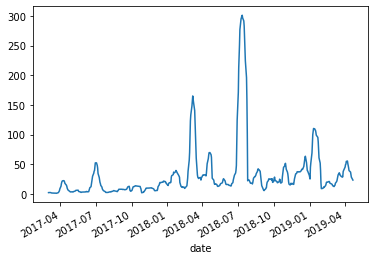

In [33]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_covariance = combined_df["FB"].rolling(window=20).cov().plot()
rolling_covariance
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data


# Calculate 30-day rolling beta of AMZN and plot the data


### Plot Rolling 30-Day Betas of Social Media Stocks

In [ ]:
# Set the figure and plot the different datasets as multiple trends on the same figure


# Set the legend of the figure
